In [1]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cloudscraper

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install selenium webdriver-manager


Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import requests

In [4]:


url = "https://gmauthority.com/blog/gm/general-motors-sales-numbers/"

headers = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "accept-language": "en-US,en;q=0.9,fr-FR;q=0.8,fr;q=0.7",
    "cache-control": "max-age=0",
    "priority": "u=0, i",
    "sec-ch-ua": '"Not(A:Brand";v="99", "Google Chrome";v="133", "Chromium";v="133")',
    "sec-ch-ua-arch": '"arm"',
    "sec-ch-ua-bitness": '"64"',
    "sec-ch-ua-full-version": '"133.0.6943.127"',
    "sec-ch-ua-full-version-list": '"Not(A:Brand";v="99.0.0.0", "Google Chrome";v="133.0.6943.127", "Chromium";v="133.0.6943.127")',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-model": '""',
    "sec-ch-ua-platform": '"macOS"',
    "sec-ch-ua-platform-version": '"14.6.1"',
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "none",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.36",
}

cookies = {
    "_gid": "GA1.2.118442213.1741241754",
    "_cc_id": "40ecfc176dfb983f4fc2ff4fdfce4c87",
    "panoramaId_expiry": "1741846554858",
    "panoramaId": "f4017a1a0385d17595993dd7479d4945a7025022677ea968d5a7f7f40ca451e5",
    "panoramaIdType": "panoIndiv",
    "connectId": '{"ttl":86400000,"lastUsed":1741241754599,"lastSynced":1741241754599}',
    "cf_clearance": "1bZyNte2s_borMZ_t.Pg5b2CXc48zXrlpiaCgoK09ow-1741256469-1.2.1.1-_SGSL6G2RkT2yqts4zy.77rDB9Na9Yqqx6QBVcUpvpf58Wl1nwmjIj33rg9VBxRK3qgQvBrsE08uATxWEmSOnYRPMgjsZBB03hRz3eIEUb7czkZi8c.fpqw9oUColVo1MX9MXypaUN0U7iG3tSuIkjhgDRRBGjMNticl4JoQY2H5Iw.368eq0sL6kDcGw2Cy3N2sJfjY5H6a6cZykUKfy.7s5z2CAnR5wQWcVnKvKEs1jPHpc73qG4QtZ9oC5eIwU5H6_1tCmAaRcAiTpJiGG9IVrbWLl6W6r4SrlCV7Ddcx0SyZrod2yH.A5lWuYgzE72eLPDFhYT8nYF0H0MnPu6rcoFf47XX2fg.yOle48m_zzHW5XYJZ3aQEjeHSMzFThSJxacRPO9pObAfep54NEzQCY5.V5da9x0BAOhnO_zD29OQyNiim.ng7EYxmWWq1rOxDpuHv2c68qA90qXF.mnjSwqlRXESERoELEzL8YV8",
    "_ga": "GA1.1.1764026330.1741241754",
}

session = requests.Session()
response = session.get(url, headers=headers, cookies=cookies)

if response.status_code == 200:
    print("✅ Successfully retrieved page!")
    page_content = response.text
else:
    print(f"❌ Failed. Status code: {response.status_code}")


❌ Failed. Status code: 403


In [5]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page_content, "html.parser")
table = soup.find("table", class_="table table-hover table-sm")

if table:
    print("✅ Table found! Extracting data...")
    data = []

    # Extract table headers
    headers = [header.text.strip() for header in table.find_all("th")]
    data.append(headers)

    # Extract table rows
    for row in table.find_all("tr")[1:]:  # Skip header row
        cells = row.find_all("td")
        row_data = [cell.text.strip() for cell in cells]
        data.append(row_data)

    print("✅ Successfully extracted data:", data)
else:
    print("❌ Table still not found.")


NameError: name 'page_content' is not defined

In [ ]:

# Convert to DataFrame
df_sales_data = pd.DataFrame(data[1:], columns=data[0])

# Save to CSV
csv_filename = "gm_sales_data.csv"
df_sales_data.to_csv(csv_filename, index=False)

print(f"✅ Data successfully saved to {csv_filename}")

# Display the first few rows
print(df_sales_data.head())



In [ ]:
import requests
from bs4 import BeautifulSoup

# Step 1: Request the page
url = "https://www.1stock1.com/1stock1_2264.htm"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

df_new_stock_data = []

# Step 2: Parse the page with BeautifulSoup
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table", {"cellspacing": "0", "cellpadding": "2", "border": "1", "bgcolor": "#ffffff"})

    if table:
        print("✅ Table found! Extracting data...")

        # Extract only the first row as headers
        header_row = table.find("tr")  # First row contains headers
        headers = [header.text.strip() for header in header_row.find_all("b")]

        # Extract table rows (skip the first row, which contains headers)
        data = []
        rows = table.find_all("tr")[1:]  # Skip the header row
        for row in rows:
            cells = row.find_all("td")
            row_data = [cell.text.strip() for cell in cells]
            data.append(row_data)

        # Step 3: Convert data to DataFrame and save CSV
        df_new_stock_data = pd.DataFrame(data, columns=headers)
        csv_filename = "stock_data_cleaned.csv"
        df_new_stock_data.to_csv(csv_filename, index=False)

        print(f"✅ Data successfully saved to {csv_filename}")
        print(df_new_stock_data.head())  # Display first few rows for verification
    else:
        print("❌ Table not found.")
else:
    print(f"❌ Failed to retrieve the page. Status code: {response.status_code}")


In [ ]:


# Step 1: Request the page
url = "https://www.1stock1.com/1stock1_421.htm"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

df_old_stock_data = []

# Step 2: Parse the page with BeautifulSoup
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("table", {"cellspacing": "0", "cellpadding": "2", "border": "1", "bgcolor": "#ffffff"})

    if table:
        print("✅ Table found! Extracting data...")

        # Extract only the first row as headers
        header_row = table.find("tr")  # First row contains headers
        headers = [header.text.strip() for header in header_row.find_all("b")]

        # Extract table rows (skip the first row, which contains headers)
        data = []
        rows = table.find_all("tr")[1:]  # Skip the header row
        for row in rows:
            cells = row.find_all("td")
            row_data = [cell.text.strip() for cell in cells]
            data.append(row_data)

        # Step 3: Convert data to DataFrame and save CSV
        df_old_stock_data = pd.DataFrame(data, columns=headers)
        csv_filename = "stock_data_421.csv"
        df_old_stock_data.to_csv(csv_filename, index=False)

        print(f"✅ Data successfully saved to {csv_filename}")
        print(df_old_stock_data.head())  # Display first few rows for verification
    else:
        print("❌ Table not found.")
else:
    print(f"❌ Failed to retrieve the page. Status code: {response.status_code}")




In [27]:
# Load old stock data from CSV
df_old_stock_data = pd.read_csv("stock_data_421.csv")

# Load new stock data from CSV
df_new_stock_data = pd.read_csv("stock_data_cleaned.csv")

# Concatenate both DataFrames
df_combined_stock_data = pd.concat([df_old_stock_data, df_new_stock_data], ignore_index=True)
print(df_combined_stock_data.dtypes)

print(df_combined_stock_data.head())

Year                      int64
Beginning Price         float64
Ending Price             object
Gain or Loss            float64
Percent Gain or Loss     object
dtype: object
   Year  Beginning Price Ending Price  Gain or Loss Percent Gain or Loss
0  1975           30.750       57.625        26.875               87.40%
1  1976           57.625        78.50        20.875               36.23%
2  1977           78.500       62.875       -15.625              -19.90%
3  1978           62.875        53.75        -9.125              -14.51%
4  1979           53.750        50.00        -3.750               -6.98%


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df_sales_data = df = pd.read_csv("gm_sales_data.csv")

sales_data = df_sales_data

# Remove commas and convert all columns to numeric
sales_data = sales_data.replace(',', '', regex=True).apply(pd.to_numeric, errors='coerce')
print("Sales data in USA")
print(sales_data.head())

Sales data in USA
   Year     Jan     Feb     Mar     Apr     May     Jun     Jul     Aug  \
0  2024  197992  197992  197992  231865  231865  231865  219785  219785   
1  2023  201069  201069  201069  230559  230559  230559  224778  224778   
2  2022  170949  170949  170949  194107  194107  194107  185193  185193   
3  2021  213996  213996  213996  229372  229372  229372  148998  148998   
4  2020  206112  206112  206112  164163  164163  164163  221731  221731   

      Sep     Oct     Nov     Dec    Total  
0  219785  251539  251539  251539  2703545  
1  224778  208389  208389  208389  2594388  
2  185193  207754  207754  207754  2274009  
3  148998  146912  146912  146912  2217832  
4  221731  257108  257108  257108  2547339  


### Data cleaning and Preprocessing

In [46]:
stock_data = df_combined_stock_data

# Remove '*' from "Ending Price" and convert to float
stock_data["Ending Price"] = stock_data["Ending Price"].astype(str).str.replace(r'\*', '', regex=True)

# Convert to numeric, handling errors properly
stock_data["Ending Price"] = pd.to_numeric(stock_data["Ending Price"], errors='coerce')

# Print missing values to check where NaNs appear
print(stock_data[stock_data["Ending Price"].isna()])


stock_data["Percent Gain or Loss"] = stock_data["Percent Gain or Loss"].astype(str).str.replace('%', '', regex=True)
stock_data["Percent Gain or Loss"] = pd.to_numeric(stock_data["Percent Gain or Loss"], errors='coerce')

stock_data = stock_data.sort_values(by="Year").drop_duplicates()

print(stock_data.dtypes)
print(stock_data)


Empty DataFrame
Columns: [Year, Beginning Price, Ending Price, Gain or Loss, Percent Gain or Loss]
Index: []
Year                      int64
Beginning Price         float64
Ending Price            float64
Gain or Loss            float64
Percent Gain or Loss    float64
dtype: object
    Year  Beginning Price  Ending Price  Gain or Loss  Percent Gain or Loss
0   1975          30.7500       57.6250       26.8750                 87.40
1   1976          57.6250       78.5000       20.8750                 36.23
2   1977          78.5000       62.8750      -15.6250                -19.90
3   1978          62.8750       53.7500       -9.1250                -14.51
4   1979          53.7500       50.0000       -3.7500                 -6.98
5   1980          50.0000       45.0000       -5.0000                -10.00
6   1981          45.0000       38.5000       -6.5000                -14.44
7   1982          38.5000       62.3750       23.8750                 62.01
8   1983          62.3750       7

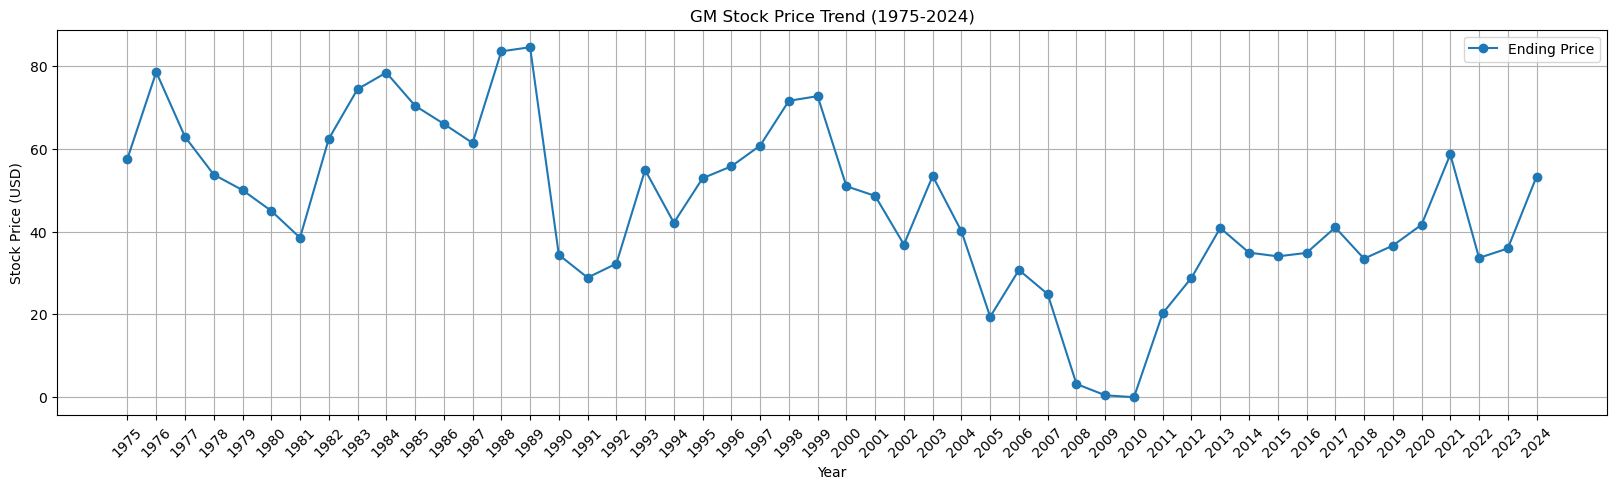

In [48]:
# Plot stock price trends
plt.figure(figsize=(20, 5))
plt.plot(stock_data["Year"], stock_data["Ending Price"], marker='o', label="Ending Price")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("GM Stock Price Trend (1975-2024)")
plt.legend()
plt.xticks(stock_data["Year"], rotation=45)  # Show every year and rotate labels
plt.grid()
plt.show()



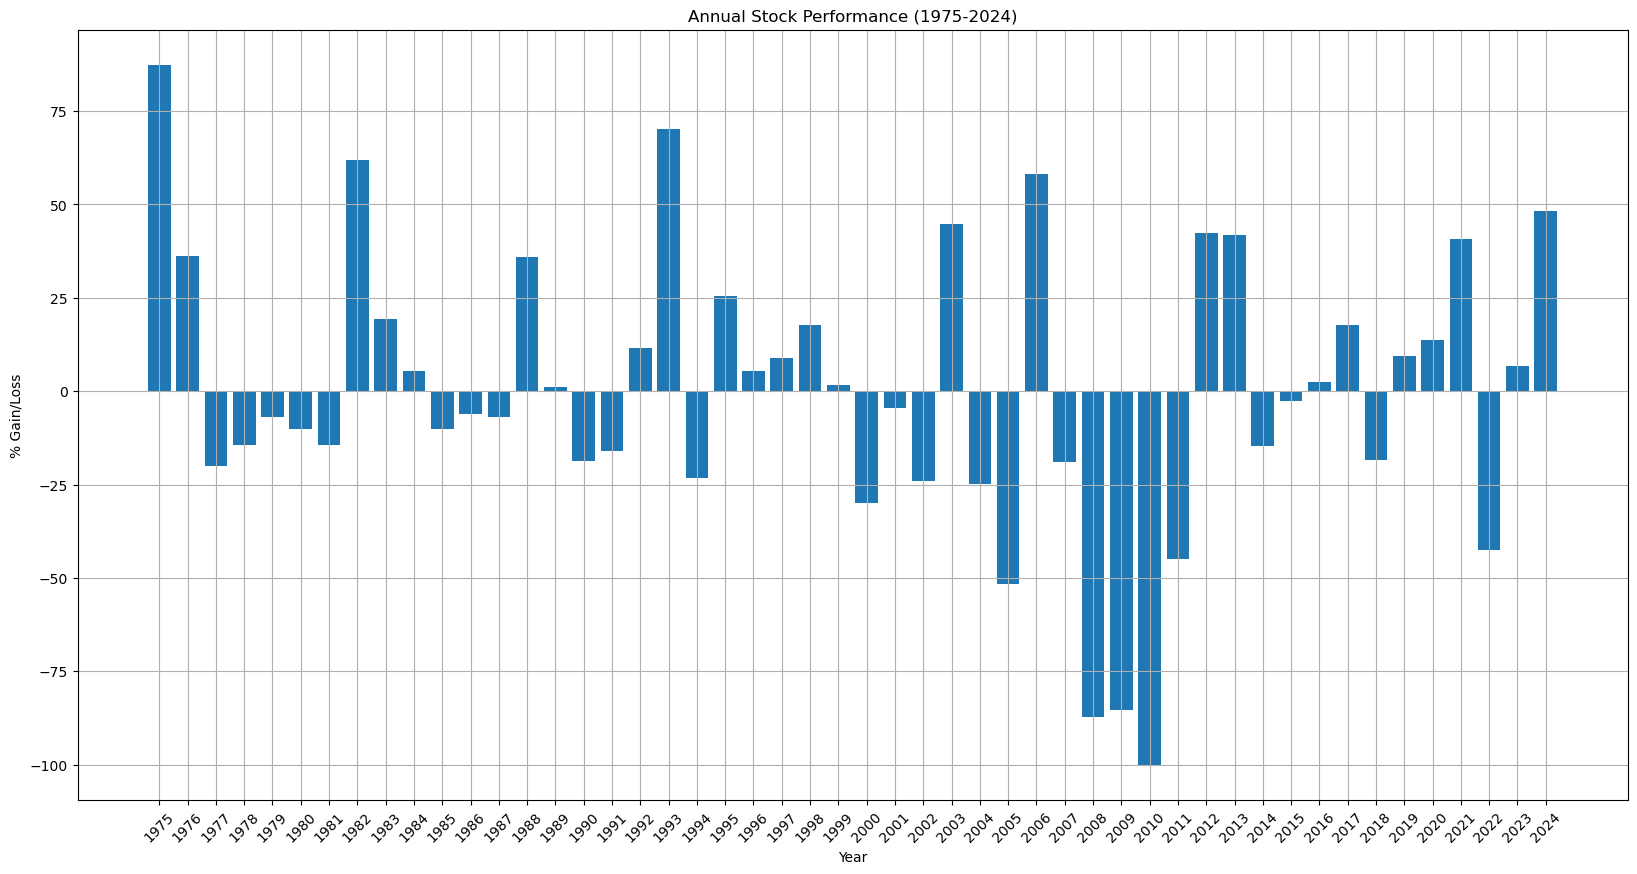

In [50]:
plt.figure(figsize=(20, 10))
plt.bar(stock_data["Year"], stock_data["Percent Gain or Loss"])
plt.xlabel("Year")
plt.ylabel("% Gain/Loss")
plt.title("Annual Stock Performance (1975-2024)")
plt.xticks(stock_data["Year"], rotation=45)  # Show every year and rotate labels
plt.grid()
plt.show()




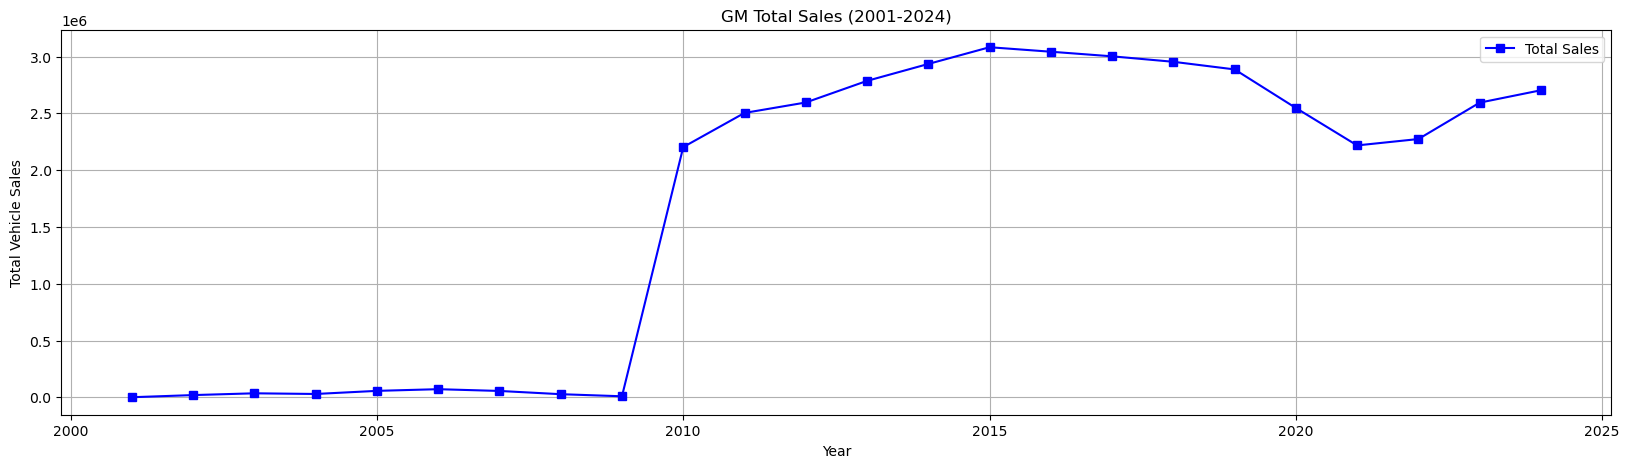

In [52]:
# Plot sales trends
plt.figure(figsize=(20, 5))
plt.plot(sales_data["Year"], sales_data["Total"], marker='s', linestyle='-', color='b', label="Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Vehicle Sales")
plt.title("GM Total Sales (2001-2024)")
plt.legend()
plt.grid()
plt.show()


In [56]:
import pandas as pd

# Remove "Total" column if it exists
sales_data_updated = sales_data.drop(columns=["Total"], errors='ignore')

# Reshape data: Convert from wide format to long format
sales_data_monthly = sales_data_updated.melt(id_vars=["Year"], var_name="Month", value_name="Sales")

# Convert "Month" names to numbers for proper date conversion
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
sales_data_monthly["Month"] = sales_data_monthly["Month"].map(month_mapping)

# Create a proper date column and set it to the last day of the month
sales_data_monthly["Date"] = pd.to_datetime(
    sales_data_monthly["Year"].astype(str) + "-" + sales_data_monthly["Month"].astype(str) + "-01"
) + pd.offsets.MonthEnd(1)

# Drop old columns and reorder
sales_data_monthly = sales_data_monthly[["Date", "Sales"]]

# Sort by date
sales_data_monthly = sales_data_monthly.sort_values(by="Date").reset_index(drop=True)

# Print transformed dataset
print(sales_data_monthly.head())  # Show first 15 rows
print(f"Total records: {len(sales_data_monthly)}")  # Verify total rows = 12 * number of years


        Date  Sales
0 2001-01-31     92
1 2001-02-28     77
2 2001-03-31     58
3 2001-04-30     65
4 2001-05-31     76
Total records: 288


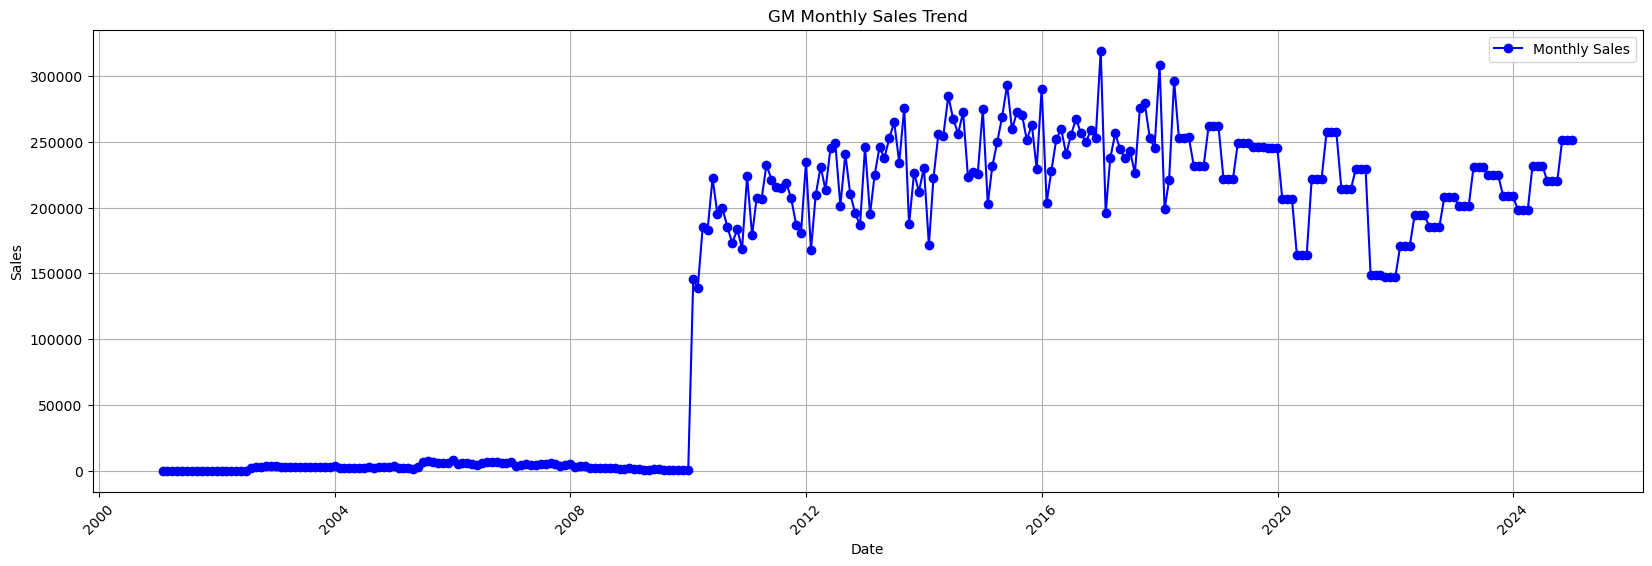

In [64]:

#sales_data_monthly_short = sales_data_monthly[(sales_data_monthly["Date"] >= "2006-06-30") & 
#                                      (sales_data_monthly["Date"] <= "2009-06-30")]

sales_data_monthly_short = sales_data_monthly

# Plot the sales trend over time
plt.figure(figsize=(20, 6))
plt.plot(sales_data_monthly_short["Date"], sales_data_monthly_short["Sales"], marker='o', linestyle='-', color='b', label="Monthly Sales")

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("GM Monthly Sales Trend")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [70]:
sales_data_yearly = sales_data[["Year", "Total"]]
print(sales_data_yearly.head())
print(sales_data_yearly.describe())


   Year    Total
0  2024  2703545
1  2023  2594388
2  2022  2274009
3  2021  2217832
4  2020  2547339
              Year         Total
count    24.000000  2.400000e+01
mean   2012.500000  1.693125e+06
std       7.071068  1.333587e+06
min    2001.000000  7.680000e+02
25%    2006.750000  5.080425e+04
50%    2012.500000  2.388914e+06
75%    2018.250000  2.811293e+06
max    2024.000000  3.082358e+06


In [66]:
print(stock_data.describe())
stock_data_yearly = stock_data[(stock_data["Year"] >= 2001) & (stock_data["Year"] <= 2024)]
print(stock_data.describe())
print(stock_data_yearly.describe())

             Year  Beginning Price  Ending Price  Gain or Loss  \
count    50.00000        50.000000     50.000000      50.00000   
mean   1999.50000        45.635370     46.193570       0.55820   
std      14.57738        18.461969     20.216725      12.72544   
min    1975.00000         0.471000      0.000000     -24.99000   
25%    1987.25000        34.101250     34.101250      -7.28000   
50%    1999.50000        41.882500     43.562500       0.17950   
75%    2011.75000        58.378750     60.220000      10.20250   
max    2024.00000        83.500000     84.500000      26.87500   

       Percent Gain or Loss  
count             50.000000  
mean               0.359600  
std               38.038468  
min             -100.000000  
25%              -18.577500  
50%               -0.690000  
75%               18.880000  
max               87.400000  
             Year  Beginning Price  Ending Price  Gain or Loss  \
count    50.00000        50.000000     50.000000      50.00000   
mea

In [74]:
sales_stock_data = stock_data_yearly.merge(sales_data_yearly, on="Year", how="left")
print(sales_stock_data)

    Year  Beginning Price  Ending Price  Gain or Loss  Percent Gain or Loss  \
0   2001          50.9375        48.600       -2.3375                 -4.59   
1   2002          48.6000        36.860      -11.7400                -24.16   
2   2003          36.8600        53.400       16.5400                 44.87   
3   2004          53.4000        40.060      -13.3400                -24.98   
4   2005          40.0600        19.420      -20.6400                -51.52   
5   2006          19.4200        30.720       11.3000                 58.19   
6   2007          30.7200        24.890       -5.8300                -18.98   
7   2008          24.8900         3.200      -21.6900                -87.14   
8   2009           3.2000         0.471       -2.7290                -85.28   
9   2010           0.4710         0.000       -0.4710               -100.00   
10  2011          36.8600        20.270      -16.5900                -45.01   
11  2012          20.2700        28.830        8.560

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Creating the dataset (Ensure you have the merged_data DataFrame)
columns_to_normalize = ["Total", "Ending Price", "Percent Gain or Loss"]
scaler = MinMaxScaler()



# Applying Min-Max normalization
normalized_data = sales_stock_data.copy()
normalized_data[columns_to_normalize] = scaler.fit_transform(sales_stock_data[columns_to_normalize])

print(normalized_data.head().T)


                                0            1            2            3  \
Year                  2001.000000  2002.000000  2003.000000  2004.000000   
Beginning Price         50.937500    48.600000    36.860000    53.400000   
Ending Price             0.828927     0.628688     0.910797     0.683268   
Gain or Loss            -2.337500   -11.740000    16.540000   -13.340000   
Percent Gain or Loss     0.603135     0.479423     0.915797     0.474240   
Total                    0.000000     0.006108     0.011193     0.009273   

                                4  
Year                  2005.000000  
Beginning Price         40.060000  
Ending Price             0.331230  
Gain or Loss           -20.640000  
Percent Gain or Loss     0.306467  
Total                    0.018159  


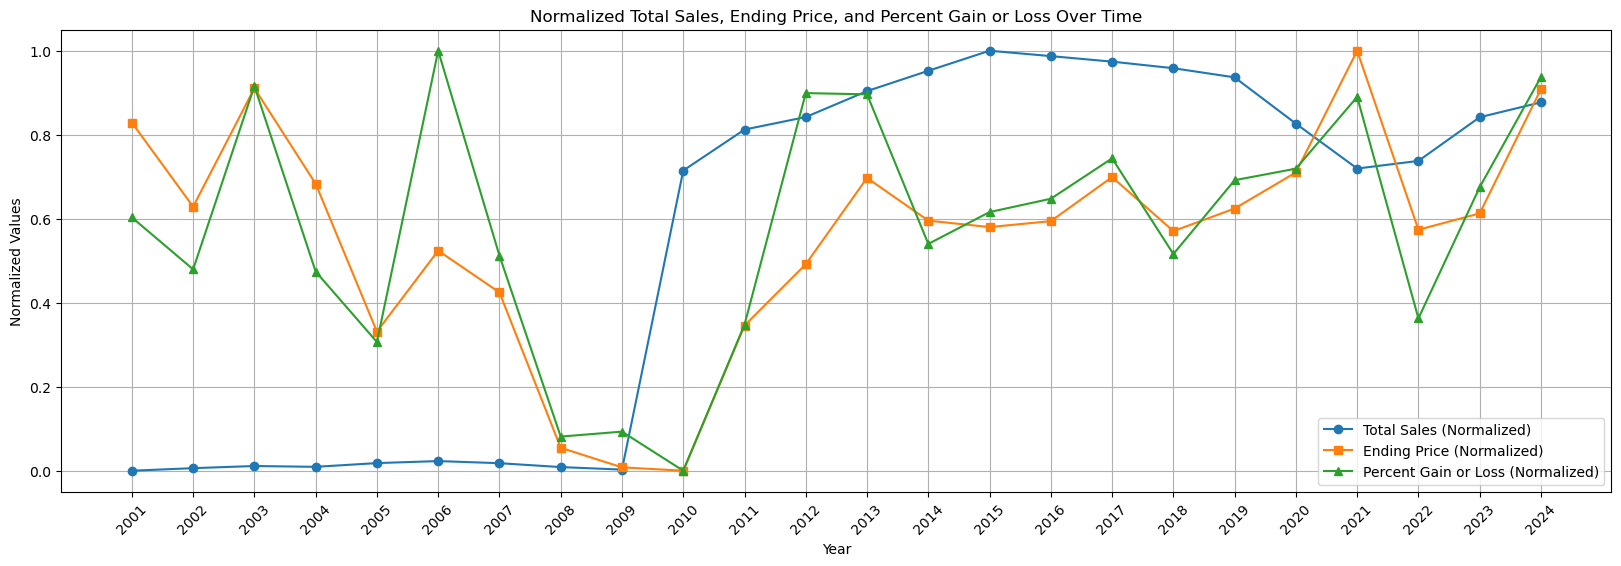

In [78]:
# Plotting the normalized values
plt.figure(figsize=(20, 6))
plt.plot(normalized_data["Year"], normalized_data["Total"], label="Total Sales (Normalized)", marker="o")
plt.plot(normalized_data["Year"], normalized_data["Ending Price"], label="Ending Price (Normalized)", marker="s")
plt.plot(normalized_data["Year"], normalized_data["Percent Gain or Loss"], label="Percent Gain or Loss (Normalized)", marker="^")

plt.xlabel("Year")
plt.ylabel("Normalized Values")
plt.title("Normalized Total Sales, Ending Price, and Percent Gain or Loss Over Time")
plt.legend()
plt.grid(True)
plt.xticks(normalized_data["Year"], rotation=45)  # Show every year and rotate labels
plt.show()


In [84]:
print("Complete Sales Data")
print(sales_data_monthly.describe().T.round(2))


print("Complete Stock Data")
print(stock_data.describe().T.round(2))

print("Stock and Sales Data")
print(sales_stock_data.describe().T.round(2))



Complete Sales Data
       count                 mean                  min                  25%  \
Date     288  2013-01-14 03:30:00  2001-01-31 00:00:00  2007-01-23 06:00:00   
Sales  288.0        141093.767361                 37.0              3721.75   

                       50%                  75%                  max  \
Date   2013-01-15 12:00:00  2019-01-07 18:00:00  2024-12-31 00:00:00   
Sales             195836.5             231865.0             319108.0   

                std  
Date            NaN  
Sales  110700.63245  
Complete Stock Data
                      count     mean    std      min      25%      50%  \
Year                   50.0  1999.50  14.58  1975.00  1987.25  1999.50   
Beginning Price        50.0    45.64  18.46     0.47    34.10    41.88   
Ending Price           50.0    46.19  20.22     0.00    34.10    43.56   
Gain or Loss           50.0     0.56  12.73   -24.99    -7.28     0.18   
Percent Gain or Loss   50.0     0.36  38.04  -100.00   -18.58    -0.6

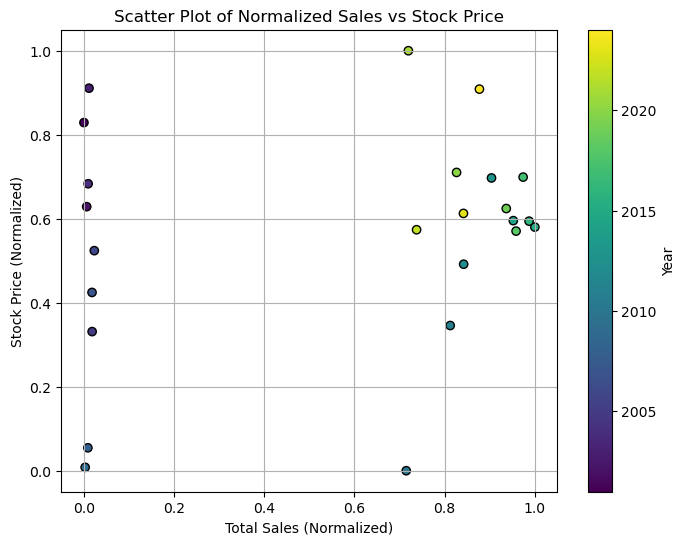

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data["Total"], normalized_data["Ending Price"], c=normalized_data["Year"], cmap="viridis", edgecolors="k")

plt.xlabel("Total Sales (Normalized)")
plt.ylabel("Stock Price (Normalized)")
plt.title("Scatter Plot of Normalized Sales vs Stock Price")
plt.colorbar(label="Year")  # Shows year as a color scale
plt.grid(True)
plt.show()


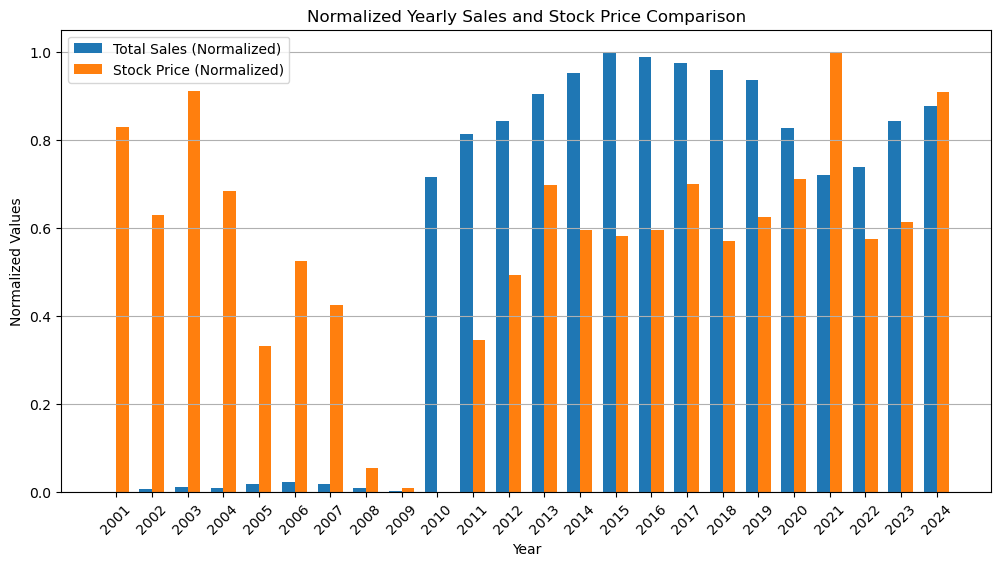

In [88]:
import numpy as np

x = np.arange(len(normalized_data["Year"]))  # X-axis positions
width = 0.35  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, normalized_data["Total"], width=width, label="Total Sales (Normalized)")
plt.bar(x + width/2, normalized_data["Ending Price"], width=width, label="Stock Price (Normalized)")

plt.xlabel("Year")
plt.ylabel("Normalized Values")
plt.title("Normalized Yearly Sales and Stock Price Comparison")
plt.xticks(x, normalized_data["Year"], rotation=45)
plt.legend()
plt.grid(axis="y")
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_data[["Total", "Ending Price", "Percent Gain or Loss"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Sales, Stock Price, and Percent Gain/Loss")
plt.show()


<H1>Data analyis after 2010</H1>

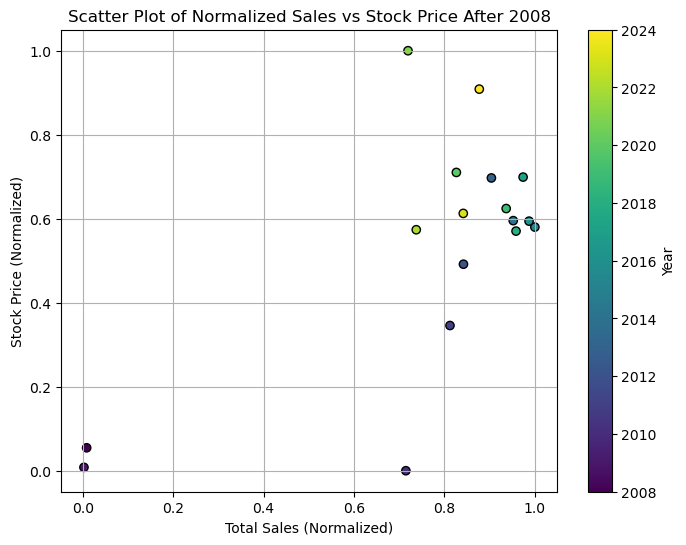

In [90]:
normalized_data_filtered = normalized_data[normalized_data["Year"] >= 2008]


plt.figure(figsize=(8, 6))
plt.scatter(normalized_data_filtered["Total"], normalized_data_filtered["Ending Price"], c=normalized_data_filtered["Year"], cmap="viridis", edgecolors="k")

plt.xlabel("Total Sales (Normalized)")
plt.ylabel("Stock Price (Normalized)")
plt.title("Scatter Plot of Normalized Sales vs Stock Price After 2008")
plt.colorbar(label="Year")  # Shows year as a color scale
plt.grid(True)
plt.show()

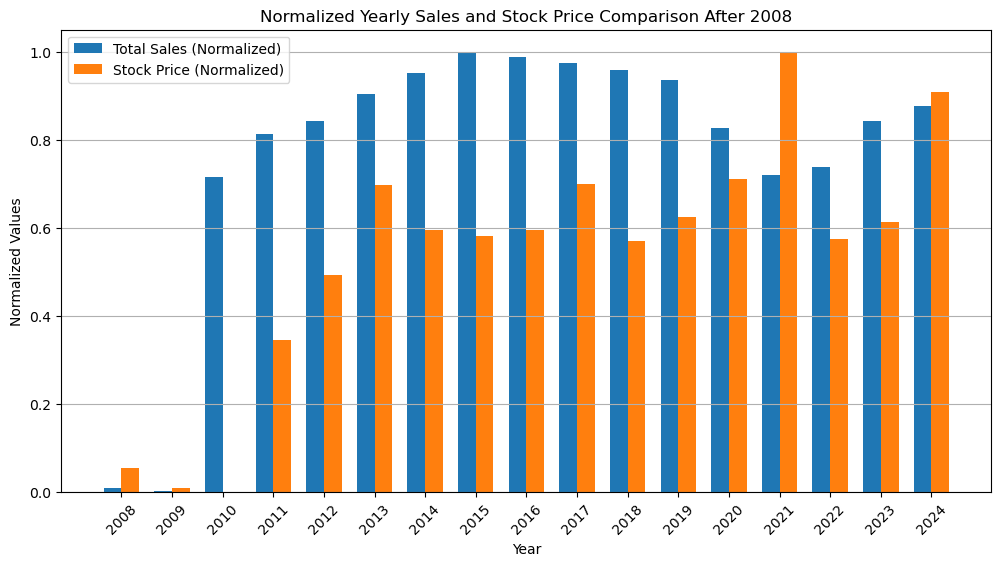

In [92]:
x = np.arange(len(normalized_data_filtered["Year"]))  # X-axis positions
width = 0.35  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, normalized_data_filtered["Total"], width=width, label="Total Sales (Normalized)")
plt.bar(x + width/2, normalized_data_filtered["Ending Price"], width=width, label="Stock Price (Normalized)")

plt.xlabel("Year")
plt.ylabel("Normalized Values")
plt.title("Normalized Yearly Sales and Stock Price Comparison After 2008")
plt.xticks(x, normalized_data_filtered["Year"], rotation=45)
plt.legend()
plt.grid(axis="y")
plt.show()

In [96]:

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_data_filtered[["Total", "Ending Price", "Percent Gain or Loss"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Sales, Stock Price, and Percent Gain/Loss After 2008")
plt.show()

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

In [98]:
pip install ruptures

Note: you may need to restart the kernel to use updated packages.


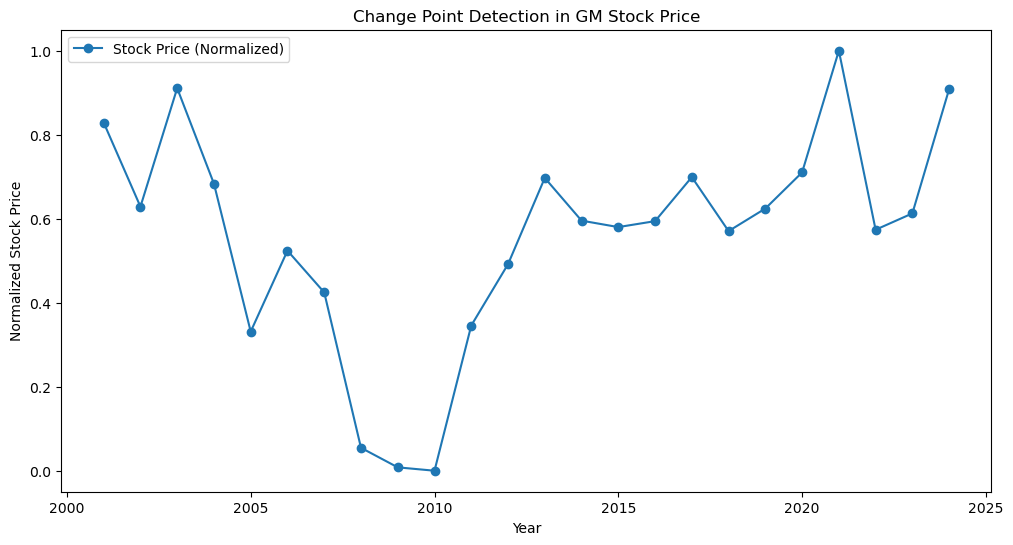

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt  # Change point detection

# Convert 'Year' to integer index
x = np.array(normalized_data["Year"])
y = np.array(normalized_data["Ending Price"])  # Stock price trend

# Change point detection using Pelt algorithm
algo = rpt.Pelt(model="l2").fit(y)
change_points = algo.predict(pen=1)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Stock Price (Normalized)", marker="o")
for cp in change_points[:-1]:  # Avoid last point (dataset end)
    plt.axvline(x=x[cp], color="r", linestyle="--", label="Change Point" if cp == change_points[0] else "")

plt.xlabel("Year")
plt.ylabel("Normalized Stock Price")
plt.title("Change Point Detection in GM Stock Price")
plt.legend()
plt.show()


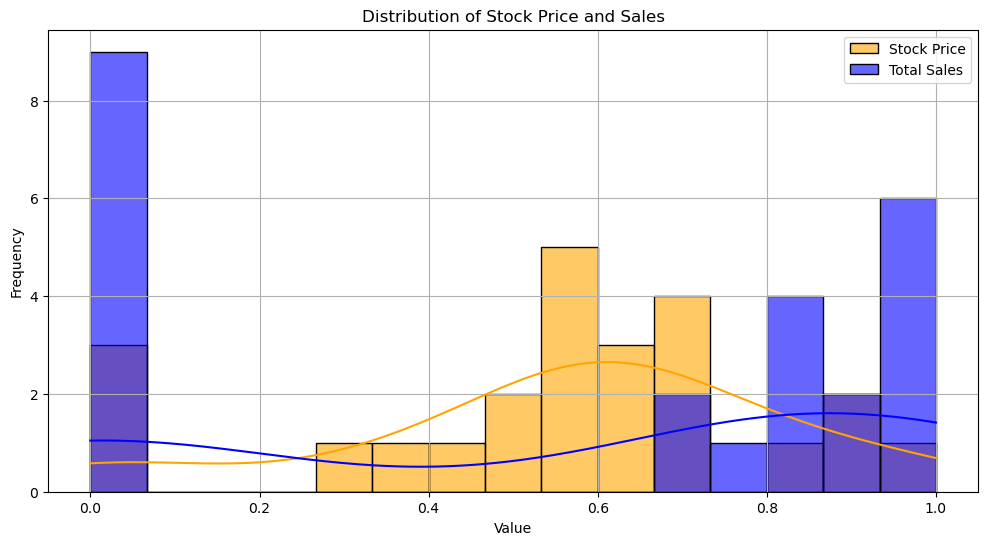

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Stock Price and Sales
plt.figure(figsize=(12, 6))

# Stock Price Distribution
sns.histplot(normalized_data["Ending Price"], bins=15, kde=True, color="orange", label="Stock Price", alpha=0.6)

# Sales Distribution
sns.histplot(normalized_data["Total"], bins=15, kde=True, color="blue", label="Total Sales", alpha=0.6)

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Stock Price and Sales")
plt.legend()
plt.grid(True)
plt.show()
